In [1]:
"C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog"
### UNEMPLOYMENT ANALYSIS IN INDIA IN R PROGRAMMING ###
### ADITYA KUMAR ROY ###

[1] "C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog"

In [3]:
## LOADING PACKAGES 
library(ggplot2)
library(lubridate)
library(moments)
library(car)
library(lmtest)
library(sandwich)
library(graphics)
library(caret)
library(Metrics)
library(patchwork)
library(gridExtra)
library(grid)
library(dplyr)

In [4]:
## DATA PREPROCESSING  
Data <- read.csv("C:/Users/DJ COMPUTERS/OneDrive/Desktop/R prog/Unemployment in India.csv")
colnames(Data) <- c("Region","Date","Frequency","Est.Unemp.Rate",
                    "Est.Emp","Labour.Part.Rate","Area")
head(Data)
str(Data)
summary(Data)
Data <- na.omit(Data)
Data$Date <- as.Date(Data$Date,format = "%d-%m-%Y")
head(Data)
summary(Data)

,Region,Date,Frequency,Est.Unemp.Rate,Est.Emp,Labour.Part.Rate,Area
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139,43.24,Rural
2,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881,42.05,Rural
3,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707,43.50,Rural
4,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693,43.97,Rural
5,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762,44.68,Rural
6,Andhra Pradesh,31-10-2019,Monthly,3.52,12017412,43.01,Rural


'data.frame':	768 obs. of  7 variables:
 $ Region          : chr  "Andhra Pradesh" "Andhra Pradesh" "Andhra Pradesh" "Andhra Pradesh" ...
 $ Date            : chr  " 31-05-2019" " 30-06-2019" " 31-07-2019" " 31-08-2019" ...
 $ Frequency       : chr  " Monthly" " Monthly" " Monthly" " Monthly" ...
 $ Est.Unemp.Rate  : num  3.65 3.05 3.75 3.32 5.17 3.52 4.12 4.38 4.84 5.91 ...
 $ Est.Emp         : num  11999139 11755881 12086707 12285693 12256762 ...
 $ Labour.Part.Rate: num  43.2 42 43.5 44 44.7 ...
 $ Area            : chr  "Rural" "Rural" "Rural" "Rural" ...


    Region              Date            Frequency         Est.Unemp.Rate  
 Length:768         Length:768         Length:768         Min.   : 0.000  
 Class :character   Class :character   Class :character   1st Qu.: 4.657  
 Mode  :character   Mode  :character   Mode  :character   Median : 8.350  
                                                          Mean   :11.788  
                                                          3rd Qu.:15.887  
                                                          Max.   :76.740  
                                                          NA's   :28      
    Est.Emp         Labour.Part.Rate     Area          
 Min.   :   49420   Min.   :13.33    Length:768        
 1st Qu.: 1190404   1st Qu.:38.06    Class :character  
 Median : 4744178   Median :41.16    Mode  :character  
 Mean   : 7204460   Mean   :42.63                      
 3rd Qu.:11275490   3rd Qu.:45.51                      
 Max.   :45777509   Max.   :72.57                      
 NA's   

,Region,Date,Frequency,Est.Unemp.Rate,Est.Emp,Labour.Part.Rate,Area
,<chr>,<date>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139,43.24,Rural
2,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881,42.05,Rural
3,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707,43.50,Rural
4,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693,43.97,Rural
5,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762,44.68,Rural
6,Andhra Pradesh,2019-10-31,Monthly,3.52,12017412,43.01,Rural


    Region               Date             Frequency         Est.Unemp.Rate  
 Length:740         Min.   :2019-05-31   Length:740         Min.   : 0.000  
 Class :character   1st Qu.:2019-08-31   Class :character   1st Qu.: 4.657  
 Mode  :character   Median :2019-11-30   Mode  :character   Median : 8.350  
                    Mean   :2019-12-12                      Mean   :11.788  
                    3rd Qu.:2020-03-31                      3rd Qu.:15.887  
                    Max.   :2020-06-30                      Max.   :76.740  
    Est.Emp         Labour.Part.Rate     Area          
 Min.   :   49420   Min.   :13.33    Length:740        
 1st Qu.: 1190404   1st Qu.:38.06    Class :character  
 Median : 4744178   Median :41.16    Mode  :character  
 Mean   : 7204460   Mean   :42.63                      
 3rd Qu.:11275490   3rd Qu.:45.51                      
 Max.   :45777509   Max.   :72.57                      

In [11]:
## EXPLORATORY DATA ANALYSIS

# checking for normality in data
jarque.test(Data$Est.Unemp.Rate)  # the plot is not normal 
jarque.test(Data$Labour.Part.Rate)   # the plot is not normal

# Data Wrangling to gain insights about Unemployment Distribution.

# analyzing average unemployment rate given the area
Avg_Unemp_by_Area <- Data |> group_by(Area) |> 
  summarise(avg_unemp_rate = mean(Est.Unemp.Rate ))
Avg_Unemp_by_Area    # average unemployment rate in Rural is less than the urban

# analyzing average unemployment rate given region
Avg_Unemp_by_Region <- Data |> group_by(Region) |> 
  summarise(avg_unemp_rate = mean(Est.Unemp.Rate ))
Code <- c("AP","AS","BH","CH","CS","D","G","GJ","HR","HP","JK","JH","KN",
          "KR","MP","MH","MG","OD","P","PJ","RJ","S","TN","TG","TR","UP",
          "UT","WB")
Avg_Unemp_by_Region <- cbind.data.frame(Avg_Unemp_by_Region,Code)
Avg_Unemp_by_Region <- Avg_Unemp_by_Region|>arrange(desc(avg_unemp_rate))
print(Avg_Unemp_by_Region)
print(Avg_Unemp_by_Region[1:3,])  # region with max unemployment rate 
print(Avg_Unemp_by_Region[26:28,])  #region with min unemployment rate 

# analyzing and plotting average unemployment rate given area and region 
Avg_Unemp_divide <- Data |> group_by(Region,Area) |> 
 summarise(avg_unemp_rate = mean(Est.Unemp.Rate ))
print(Avg_Unemp_divide)
# filtering for rural area 
Avg_Unemp_divide_rural <- Avg_Unemp_divide |> filter(Area == "Rural")
Code <- c("AP","AS","BH","CS","D","G","GJ","HR","HP","JK","JH","KN",
          "KR","MP","MH","MG","OD","P","PJ","RJ","S","TN","TG","TR","UP",
          "UT","WB")
Avg_Unemp_divide_rural <- cbind.data.frame(Avg_Unemp_divide_rural,Code)
head(Avg_Unemp_divide_rural)
# filtering for urban area
Avg_Unemp_divide_urban <- Avg_Unemp_divide |> filter(Area == "Urban")
Code <- c("AP","AS","BH","CH","CS","D","G","GJ","HR","HP","JK","JH","KN",
          "KR","MP","MH","MG","OD","P","PJ","RJ","S","TN","TG","TR","UP",
          "UT","WB")
Avg_Unemp_divide_urban <- cbind.data.frame(Avg_Unemp_divide_urban,Code)
head(Avg_Unemp_divide_urban)

# checking for factors influencing unemployment rate .
Data$Area <- ifelse(Data$Area == "Rural",1,0)
#feature matrix
num_matrix <- data.frame(Data$Est.Unemp.Rate,
                     Data$Est.Emp,Data$Labour.Part.Rate,Data$Area)
cor(num_matrix) 
# thus labour participation rate & area has negative correlation with unemployment rate.
#Hence rural areas have low unemployment rate across various regions .



	Jarque-Bera Normality Test

data:  Data$Est.Unemp.Rate
JB = 2298.9, p-value < 2.2e-16
alternative hypothesis: greater



	Jarque-Bera Normality Test

data:  Data$Labour.Part.Rate
JB = 301.54, p-value < 2.2e-16
alternative hypothesis: greater


Area,avg_unemp_rate
<chr>,<dbl>
Rural,10.32479
Urban,13.16661


             Region avg_unemp_rate Code
1           Tripura      28.350357   TR
2           Haryana      26.283214   HR
3         Jharkhand      20.585000   JH
4             Bihar      18.918214   BH
5  Himachal Pradesh      18.540357   HP
6             Delhi      16.495357    D
7   Jammu & Kashmir      16.188571   JK
8        Chandigarh      15.991667   CH
9         Rajasthan      14.058214   RJ
10    Uttar Pradesh      12.551429   UP
11           Punjab      12.031071   PJ
12       Puducherry      10.215000    P
13           Kerala      10.123929   KR
14       Tamil Nadu       9.284286   TN
15              Goa       9.274167    G
16     Chhattisgarh       9.240357   CS
17      West Bengal       8.124643   WB
18        Telangana       7.737857   TG
19      Maharashtra       7.557500   MH
20   Andhra Pradesh       7.477143   AP
21   Madhya Pradesh       7.406429   MP
22           Sikkim       7.249412    S
23        Karnataka       6.676071   KN
24          Gujarat       6.663929   GJ


`summarise()` has grouped output by 'Region'. You can override using the `.groups` argument.


# A tibble: 55 × 3
# Groups:   Region [28]
   Region         Area  avg_unemp_rate
   <chr>          <chr>          <dbl>
 1 Andhra Pradesh Rural           5.53
 2 Andhra Pradesh Urban           9.43
 3 Assam          Rural           4.49
 4 Assam          Urban           8.09
 5 Bihar          Rural          16.8 
 6 Bihar          Urban          21.1 
 7 Chandigarh     Urban          16.0 
 8 Chhattisgarh   Rural           6.63
 9 Chhattisgarh   Urban          11.9 
10 Delhi          Rural          15.3 
# ℹ 45 more rows


,Region,Area,avg_unemp_rate,Code
,<chr>,<chr>,<dbl>,<chr>
1,Andhra Pradesh,Rural,5.526429,AP
2,Assam,Rural,4.490833,AS
3,Bihar,Rural,16.770000,BH
4,Chhattisgarh,Rural,6.628571,CS
5,Delhi,Rural,15.258571,D
6,Goa,Rural,8.390000,G


,Region,Area,avg_unemp_rate,Code
,<chr>,<chr>,<dbl>,<chr>
1,Andhra Pradesh,Urban,9.427857,AP
2,Assam,Urban,8.088571,AS
3,Bihar,Urban,21.066429,BH
4,Chandigarh,Urban,15.991667,CH
5,Chhattisgarh,Urban,11.852143,CS
6,Delhi,Urban,17.732143,D


,Data.Est.Unemp.Rate,Data.Est.Emp,Data.Labour.Part.Rate,Data.Area
Data.Est.Unemp.Rate,1.000000000,-0.22287640,0.002557965,-0.1325627
Data.Est.Emp,-0.222876400,1.00000000,0.011300255,0.3589017
Data.Labour.Part.Rate,0.002557965,0.01130026,1.000000000,0.2197168
Data.Area,-0.132562684,0.35890169,0.219716843,1.0000000


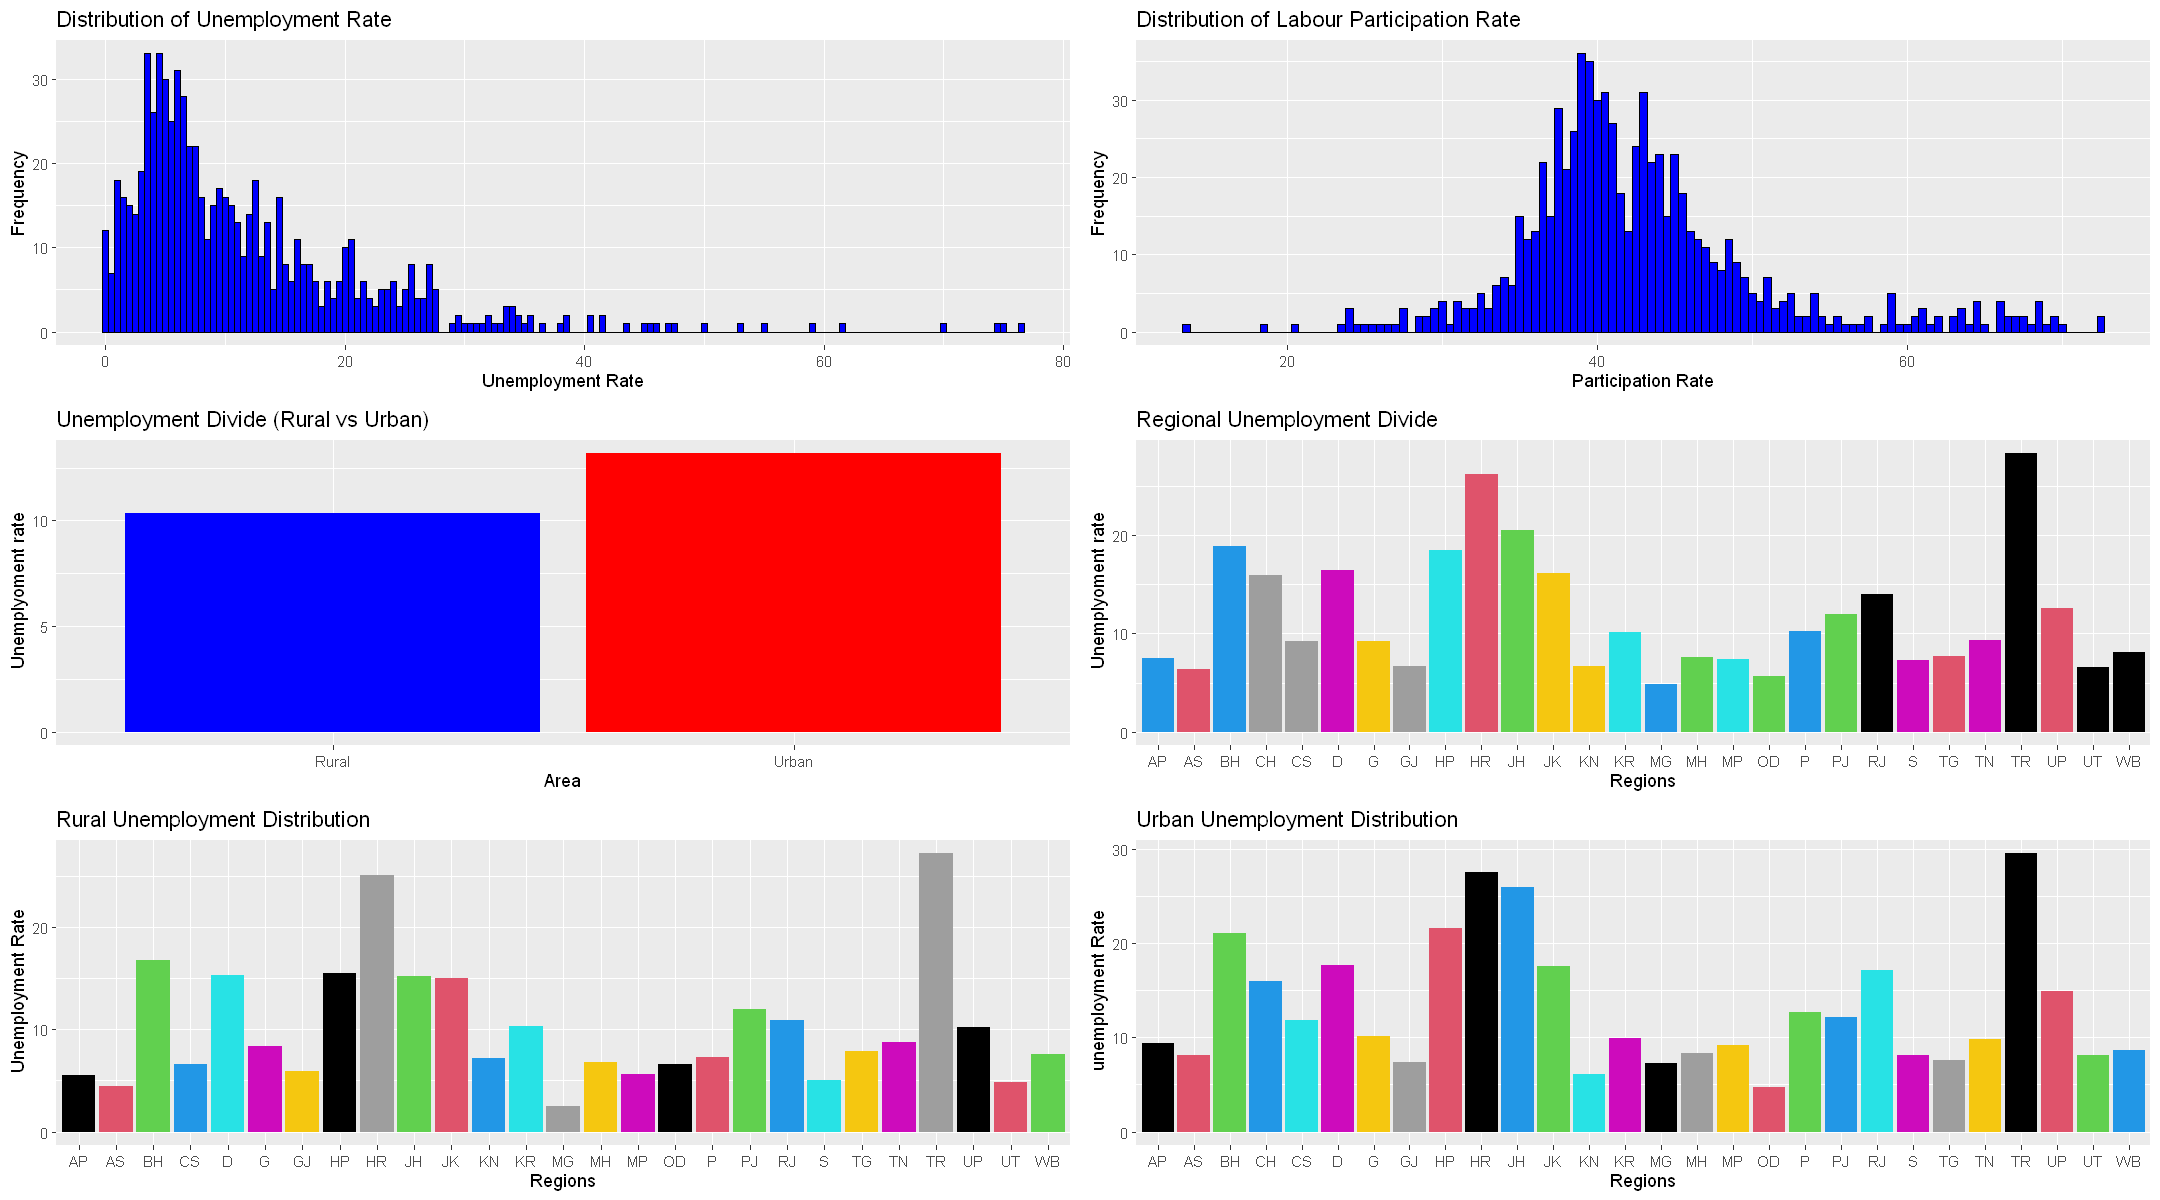

In [6]:
## EXPLORATORY DATA ANALYSIS

# Visualizing the data to fing hidden patterns.
library(grid)
library(repr)
options(repr.plot.width = 18, repr.plot.height = 10)
# plotting estimated unemployment rate 
plot1<- ggplot(Data, aes(x = Est.Unemp.Rate)) + 
  geom_histogram(binwidth = 0.5, fill = 'blue', color = 'black') +
  labs(title = "Distribution of Unemployment Rate",
       x = "Unemployment Rate", y = "Frequency")

# plotting estimated labor participation rate 
plot2<- ggplot(Data, aes(x = Labour.Part.Rate)) + 
  geom_histogram(binwidth = 0.5, fill = 'blue', color = 'black') +
  labs(title = "Distribution of Labour Participation Rate",
       x = "Participation Rate", y = "Frequency")

plot3<- ggplot( Avg_Unemp_by_Area,aes(x = Area,y = avg_unemp_rate))+
  geom_col(fill= c("blue","red"))+
  labs(title= "Unemployment Divide (Rural vs Urban)",
       x= "Area",y = " Unemplyoment rate")

plot4<- ggplot(Avg_Unemp_by_Region , aes(x= Code,y = avg_unemp_rate))+
  geom_col(fill = c(1:28),position = "stack") +
  labs(title =  "Regional Unemployment Divide",x = "Regions",
       y = " Unemplyoment rate")

plot5<- ggplot(Avg_Unemp_divide_rural,aes(x = Code,y = avg_unemp_rate))+
  geom_col(fill = c(1:27)) + labs(title = "Rural Unemployment Distribution",
                    x = "Regions",y = " Unemployment Rate")

plot6<- ggplot(Avg_Unemp_divide_urban,aes(x = Code,y = avg_unemp_rate))+
  geom_col(fill = c(1:28)) + 
  labs(title = "Urban Unemployment Distribution",
                    x = "Regions",y = " unemployment Rate")
grid.arrange(plot1,plot2,plot3, plot4, plot5, plot6, nrow = 3, ncol = 2)

`summarise()` has grouped output by 'Region'. You can override using the `.groups` argument.


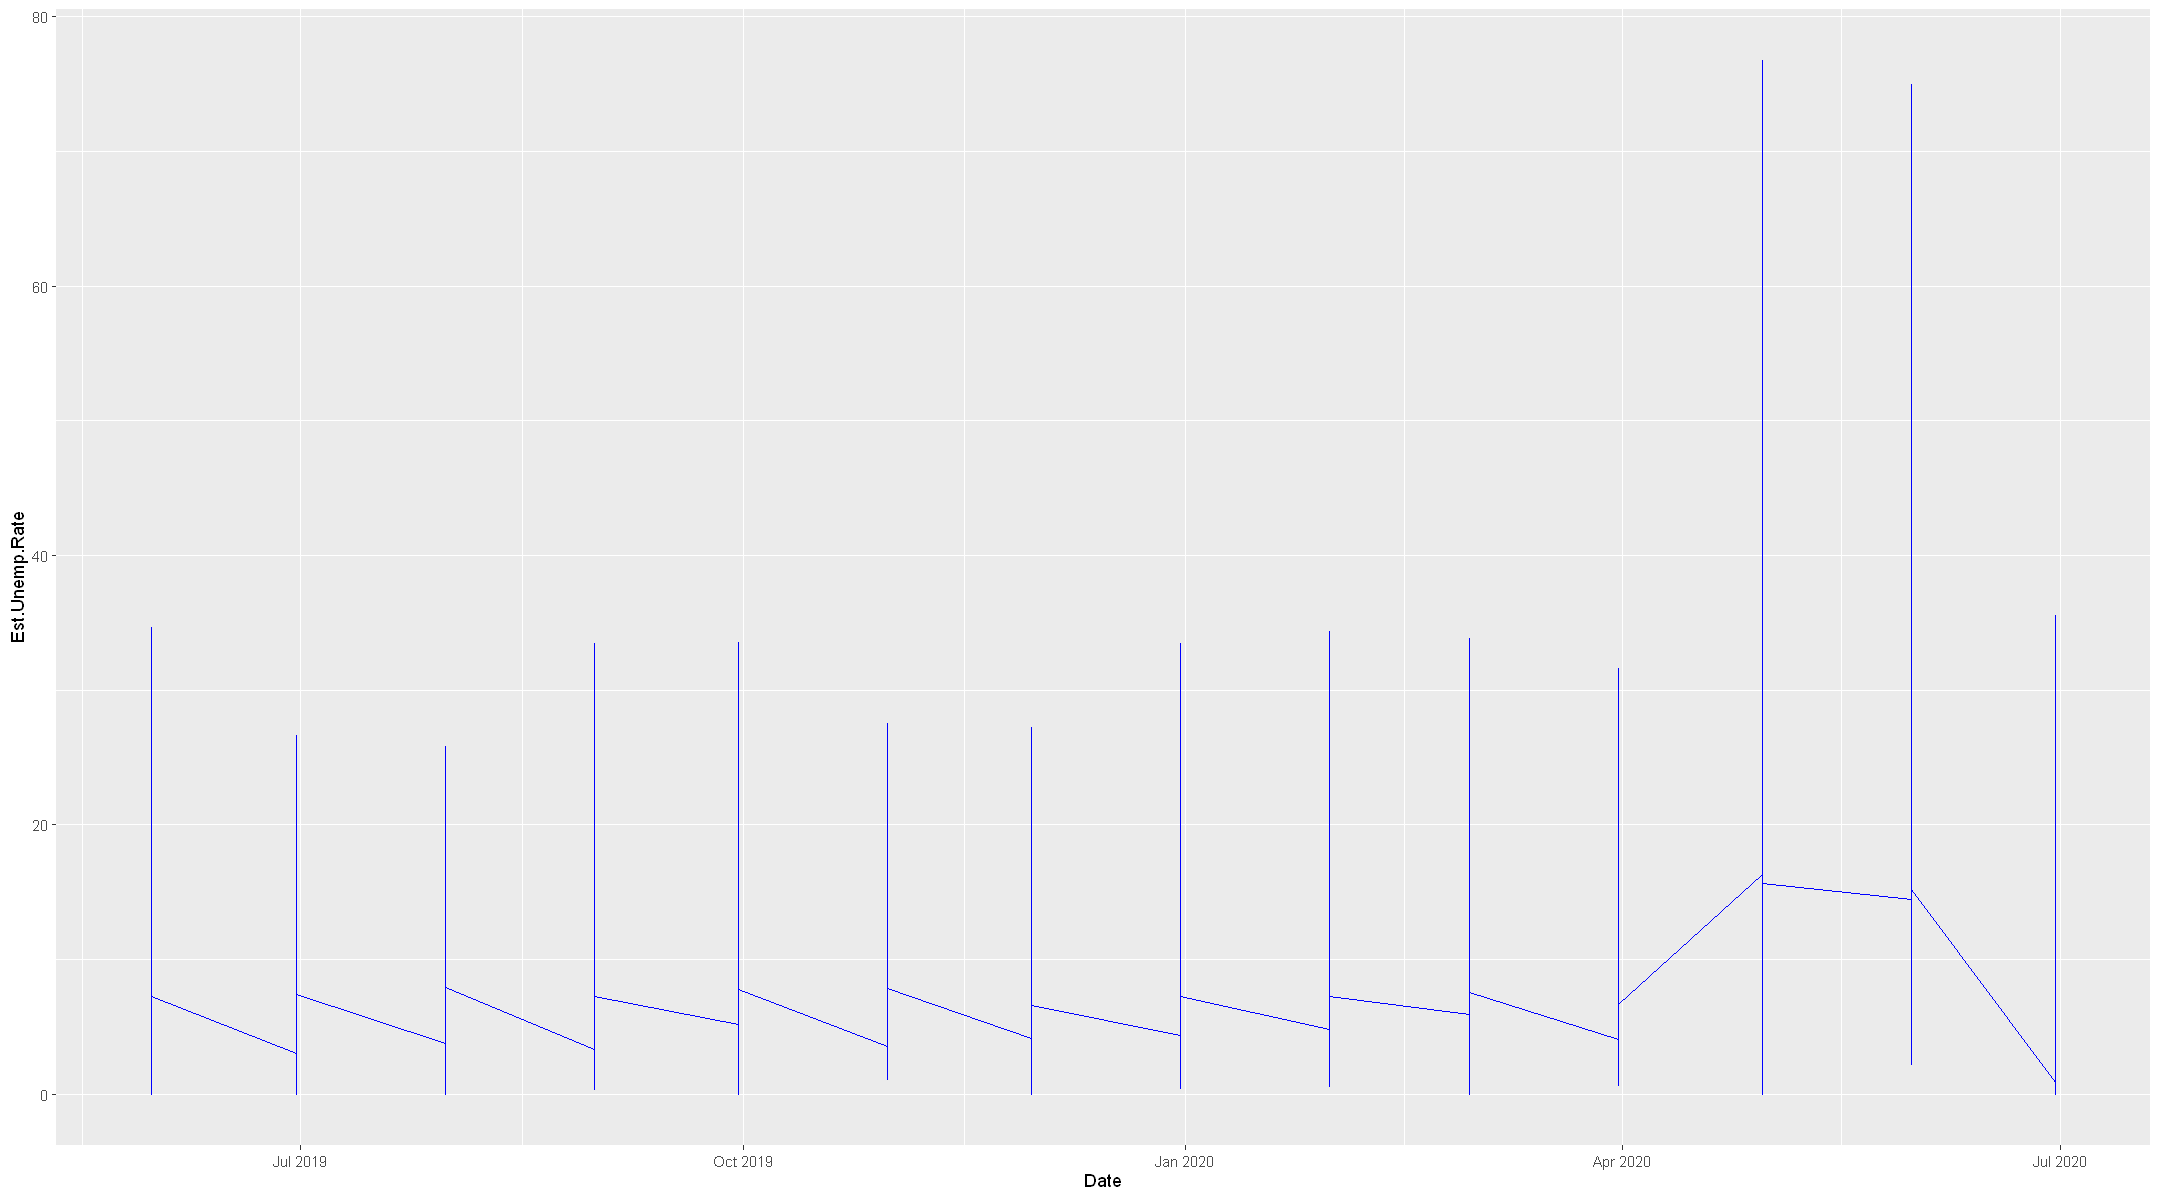

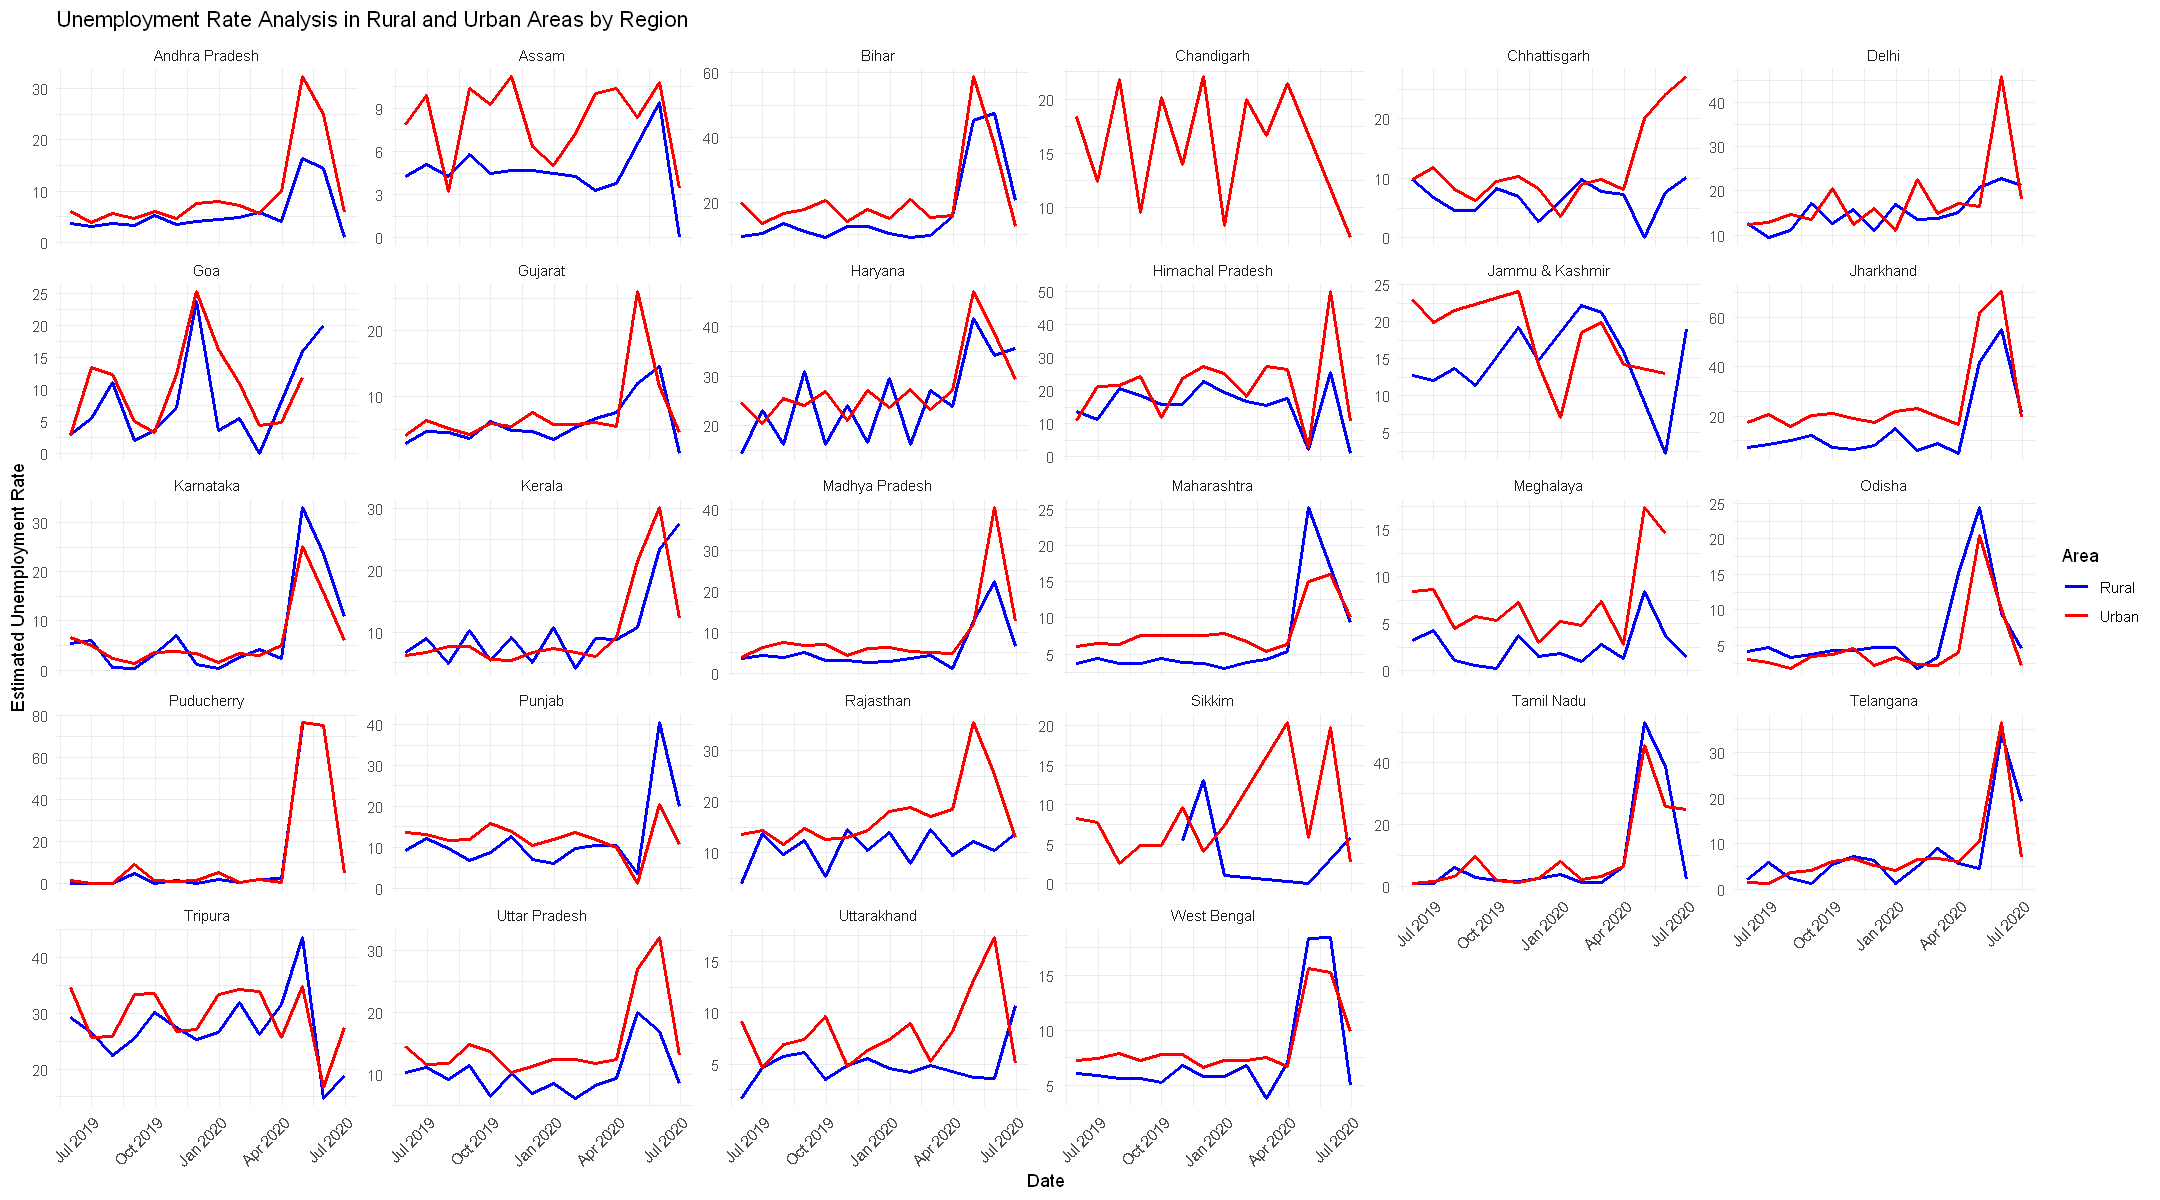

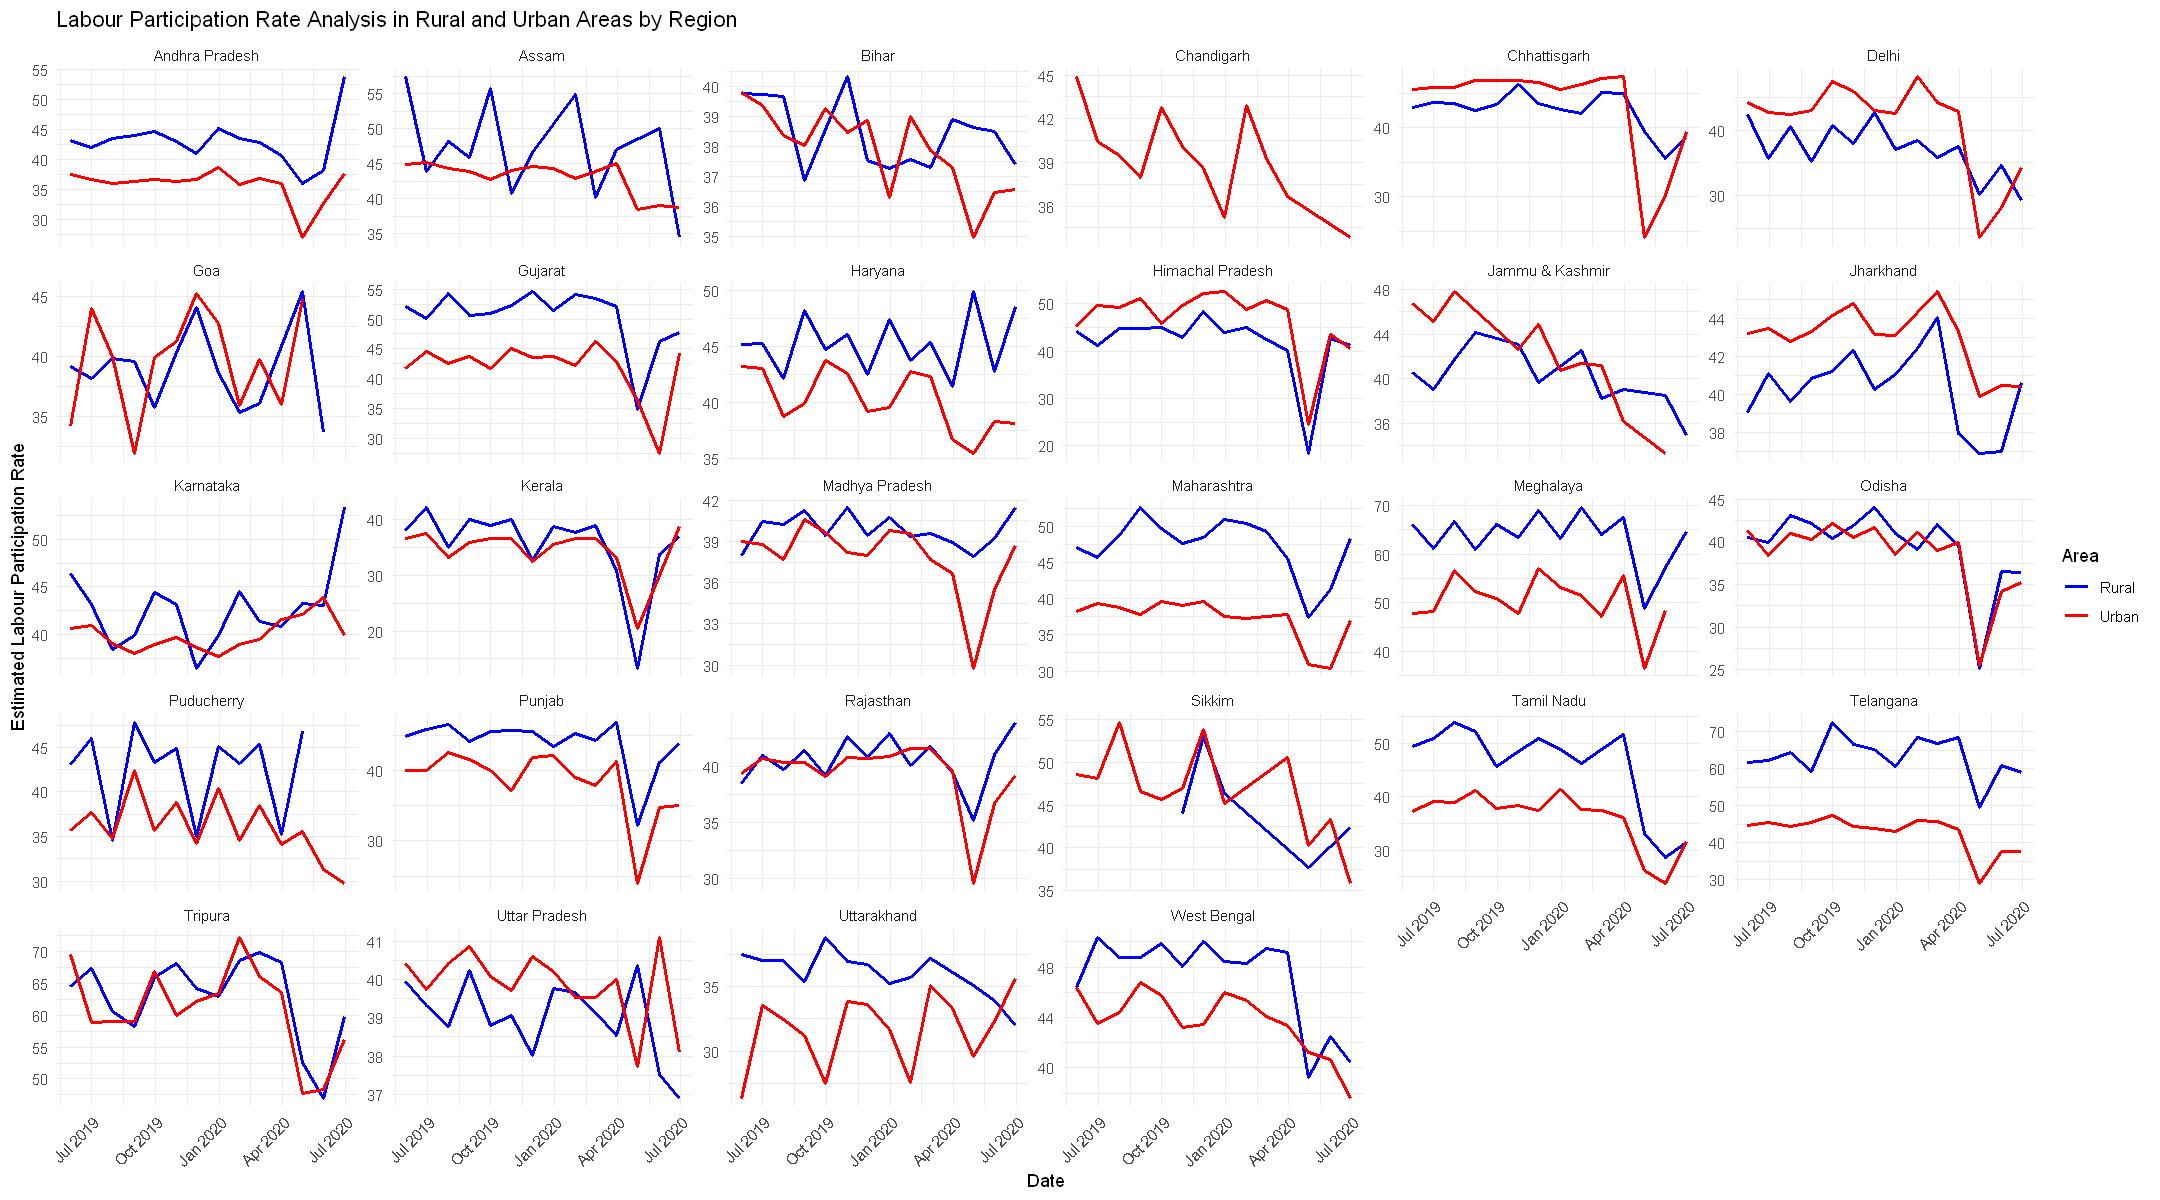

In [8]:
## Data Visualization 
# visualizing time series data 
ggplot(Data,aes(x= Date,y = Est.Unemp.Rate))+
  geom_line(col = "blue")
# shows increase in unemployment rate during covid (between april and july 2020)

trends_in_unemp <-Data |> group_by(Region,Date) |>
  summarise(avg_unemp_rate = mean(Est.Unemp.Rate)) |>
  arrange(Region)
#trends in each region based on area
trends_in_area <- Data |> group_by(Date,Area)
ggplot(trends_in_area, aes(x = Date, y = Est.Unemp.Rate, color = Area)) +
  geom_line(size = 1) + 
  facet_wrap(~ Region, scales = "free_y") +  # Facet by region
  labs(
    title = "Unemployment Rate Analysis in Rural and Urban Areas by Region",
    x = "Date",
    y = "Estimated Unemployment Rate"
  ) +
  theme_minimal() +  # Clean theme for better readability
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels
  scale_color_manual(values = c("blue", "red"))
# urban areas tend to have more unemployment rate than rural areas.

# analysis of labour participation rate 
trends_in_labour_part <- Data |> group_by(Date,Area)
ggplot(trends_in_labour_part, aes(x = Date, y = Labour.Part.Rate, color = Area)) +
  geom_line(size = 1) + 
  facet_wrap(~ Region, scales = "free_y") +  # Facet by region
  labs(
    title = "Labour Participation Rate Analysis in Rural and Urban Areas by Region",
    x = "Date",
    y = "Estimated Labour Participation Rate"
  ) +
  theme_minimal() +  # Clean theme for better readability
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels
  scale_color_manual(values = c("blue", "red"))
# thus labour participation rate is more in rural areas.



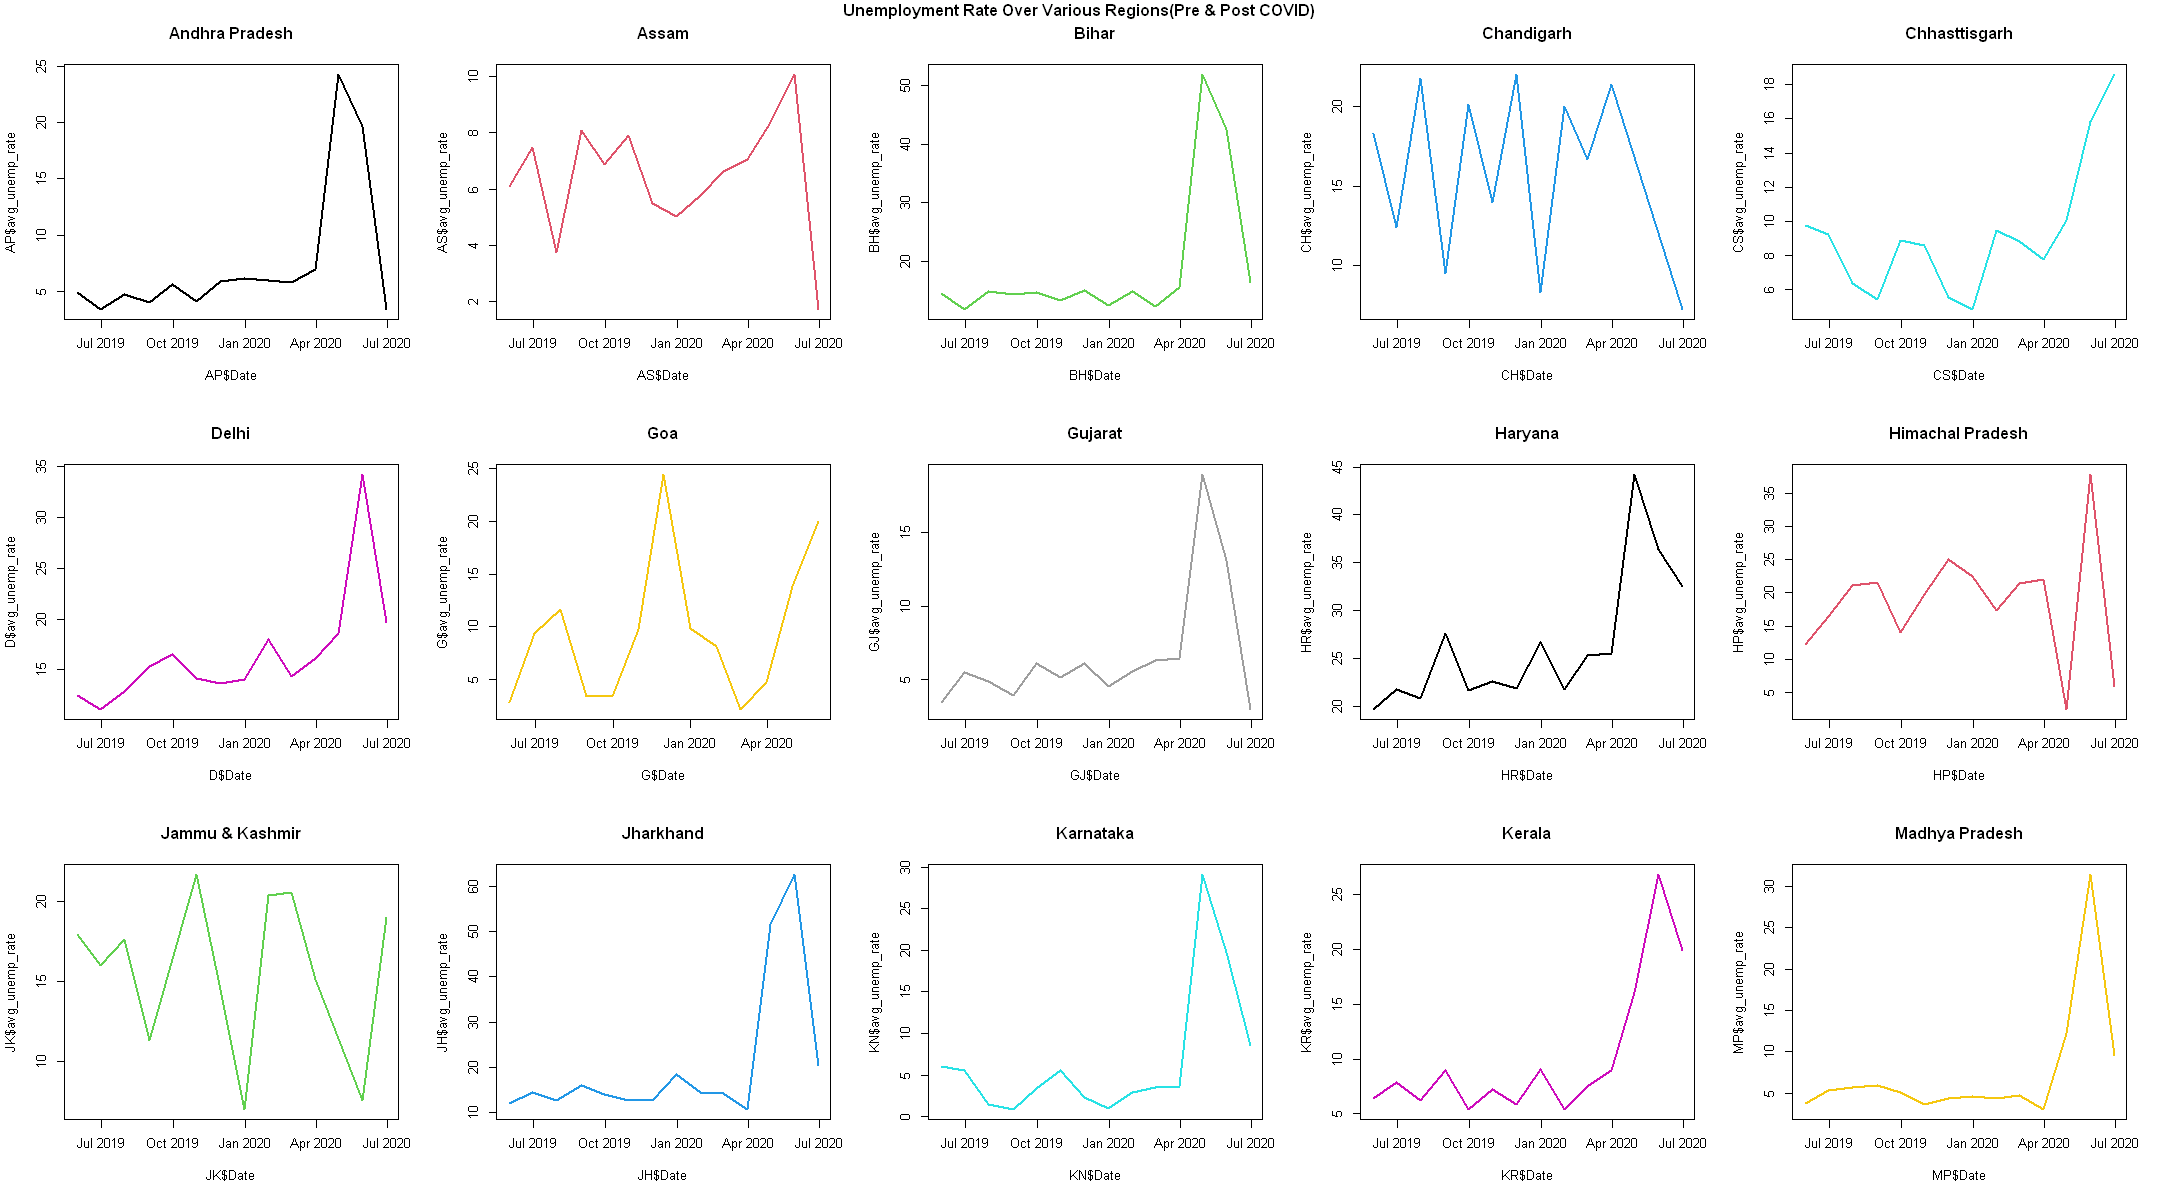

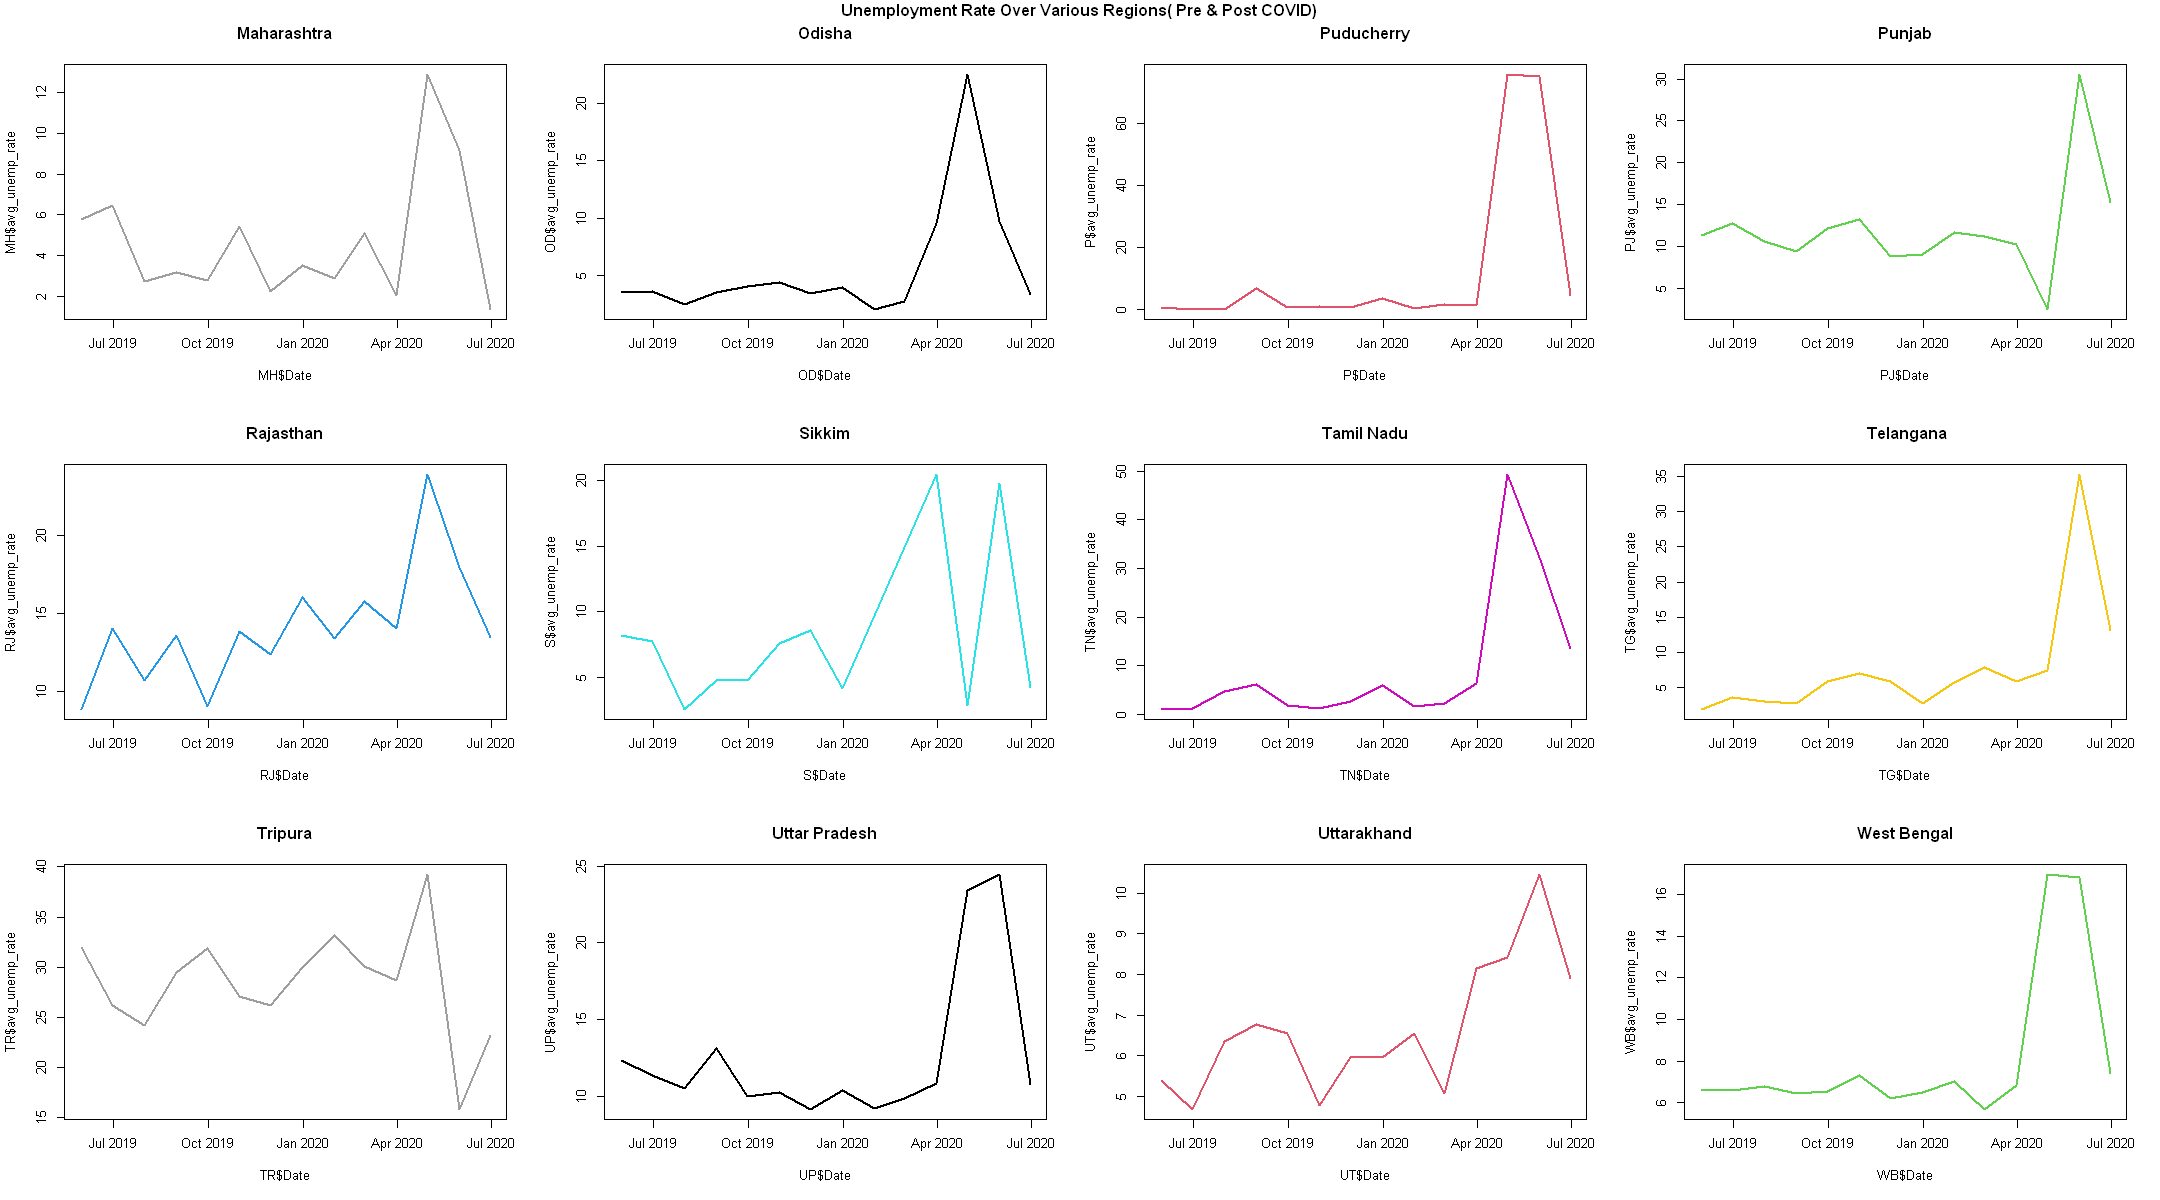

In [12]:
# Regional Analysis Of Unemployment Rate for Post and Pre Covid.

par(mfrow = c(3,5))
AP <- trends_in_unemp |>filter(Region == "Andhra Pradesh")
plot(AP$Date,AP$avg_unemp_rate,type = "l",lwd = 2,col = 1,
     main = "Andhra Pradesh")

AS <- trends_in_unemp |>filter(Region == "Assam")
plot(AS$Date,AS$avg_unemp_rate,type = "l",lwd = 2,col = 2,
     main = "Assam")

BH <- trends_in_unemp |>filter(Region == "Bihar")
plot(BH$Date,BH$avg_unemp_rate,type = "l",lwd = 2,col = 3,
     main = "Bihar")

CH <- trends_in_unemp |>filter(Region == "Chandigarh")
plot(CH$Date,CH$avg_unemp_rate,type = "l",lwd = 2,col = 4,
     main = "Chandigarh")

CS <- trends_in_unemp |>filter(Region == "Chhattisgarh")
plot(CS$Date,CS$avg_unemp_rate,type = "l",lwd = 2,col = 5,
     main = "Chhasttisgarh")

D <- trends_in_unemp |>filter(Region == "Delhi")
plot(D$Date,D$avg_unemp_rate,type = "l",lwd = 2,col = 6,
     main ="Delhi")

G <- trends_in_unemp |>filter(Region == "Goa")
plot(G$Date,G$avg_unemp_rate,type = "l",lwd = 2,col = 7,
     main = "Goa")

GJ <- trends_in_unemp |>filter(Region == "Gujarat")
plot(GJ$Date,GJ$avg_unemp_rate,type = "l",lwd = 2,col = 8,
     main = "Gujarat")

HR <- trends_in_unemp |>filter(Region == "Haryana")
plot(HR$Date,HR$avg_unemp_rate,type = "l",lwd = 2,col = 9,
     main = "Haryana")

HP <- trends_in_unemp |>filter(Region == "Himachal Pradesh")
plot(HP$Date,HP$avg_unemp_rate,type = "l",lwd = 2,col = 10,
     main = "Himachal Pradesh")

JK <- trends_in_unemp |>filter(Region == "Jammu & Kashmir")
plot(JK$Date,JK$avg_unemp_rate,type = "l",lwd = 2,col = 11,
     main = "Jammu & Kashmir")

JH <- trends_in_unemp |>filter(Region == "Jharkhand")
plot(JH$Date,JH$avg_unemp_rate,type = "l",lwd = 2,col = 12,
      main = "Jharkhand")

KN <- trends_in_unemp |>filter(Region == "Karnataka")
plot(KN$Date,KN$avg_unemp_rate,type = "l",lwd = 2,col = 13,
     main = "Karnataka")

KR <- trends_in_unemp |>filter(Region == "Kerala")
plot(KR$Date,KR$avg_unemp_rate,type = "l",lwd = 2,col = 14,
     main = "Kerala")

MP <- trends_in_unemp |>filter(Region == "Madhya Pradesh")
plot(MP$Date,MP$avg_unemp_rate,type = "l",lwd = 2,col = 15,
     main = "Madhya Pradesh")
title(main = "Unemployment Rate Over Various Regions(Pre & Post COVID)",
      outer = TRUE,line = -1)

par(mfrow = c(3,4))
MH <- trends_in_unemp |>filter(Region == "Meghalaya")
plot(MH$Date,MH$avg_unemp_rate,type = "l",lwd = 2,col =16,
     main = "Maharashtra")

OD <- trends_in_unemp |>filter(Region == "Odisha")
plot(OD$Date,OD$avg_unemp_rate,type = "l",lwd = 2,col = 17,
     main = "Odisha")

P <- trends_in_unemp |>filter(Region == "Puducherry")
plot(P$Date,P$avg_unemp_rate,type = "l",lwd = 2,col = 18,
     main = "Puducherry")

PJ <- trends_in_unemp |>filter(Region == "Punjab")
plot(PJ$Date,PJ$avg_unemp_rate,type = "l",lwd = 2,col = 19,
     main = "Punjab")

RJ <- trends_in_unemp |>filter(Region == "Rajasthan")
plot(RJ$Date,RJ$avg_unemp_rate,type = "l",lwd = 2,col = 20,
     main = "Rajasthan")

S <- trends_in_unemp |>filter(Region == "Sikkim")
plot(S$Date,S$avg_unemp_rate,type = "l",lwd = 2,col = 21,
     main = "Sikkim")

TN <- trends_in_unemp |>filter(Region == "Tamil Nadu")
plot(TN$Date,TN$avg_unemp_rate,type = "l",lwd = 2,col = 22,
     main = "Tamil Nadu")

TG <- trends_in_unemp |>filter(Region == "Telangana")
plot(TG$Date,TG$avg_unemp_rate,type = "l",lwd = 2,col = 23,
     main = " Telangana")

TR <- trends_in_unemp |>filter(Region == "Tripura")
plot(TR$Date,TR$avg_unemp_rate,type = "l",lwd = 2,col = 24, 
     main = "Tripura")

UP <- trends_in_unemp |>filter(Region == "Uttar Pradesh")
plot(UP$Date,UP$avg_unemp_rate,type = "l",lwd = 2,col = 25,
     main = "Uttar Pradesh")

UT <- trends_in_unemp |>filter(Region == "Uttarakhand")
plot(UT$Date,UT$avg_unemp_rate,type = "l",lwd = 2,col = 26,
     main = "Uttarakhand")

WB <- trends_in_unemp |>filter(Region == "West Bengal")
plot(WB$Date,WB$avg_unemp_rate,type = "l",lwd = 2,col = 27,
     main = "West Bengal")
title(main = "Unemployment Rate Over Various Regions( Pre & Post COVID)",
      outer = TRUE,line = -1)

# THUS ,IT CAN BE CONCLUDED THAT THERE HAS BEEN INCREASE IN UNEMPLOYMENT 
# RATE DURING COVID (BETWEEN APRIL 2020- JULY 2020).

In [13]:
### CONCLUSION ###
## There was increase in unemployment during the period of covid (APril 2020 to July 2020).
## Urban areas tend to have more unemployment rate then the Rural areas .
## One reason for this can be that Rural areas have high labour participation rate than Urban areas.